In [6]:
!pip install openpyxl
!pip install seaborn

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [8]:
df = pd.read_excel("/content/ddp_data.xlsx")
df = df.sort_values(by='Date')
df['Date'] = df['Date'].dt.to_period('M').dt.to_timestamp()
df = df.set_index('Date')
df = df.asfreq('MS')

In [9]:
df.info()
df.describe().T
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 348 entries, 1991-01-01 to 2019-12-01
Freq: MS
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   US TBill 10Y Yield(%)                   348 non-null    float64
 1   Rolling Volatility (1 Year)             348 non-null    float64
 2   Fed Funds Rate (%)                      348 non-null    float64
 3   Building permits(in thousands)          348 non-null    int64  
 4   S&P 500(CONVERT TO PERCENT)             348 non-null    float64
 5   German Bund Yield                       348 non-null    float64
 6   Consumer Sentiment Index                348 non-null    float64
 7   Debt to GDP                             348 non-null    float64
 8   Unemployment Rate(%)                    348 non-null    float64
 9   Crude Oil Front Month Future (USD/bbl)  348 non-null    float64
 10  Industrial Production Index       

,0
US TBill 10Y Yield(%),0
Rolling Volatility (1 Year),0
Fed Funds Rate (%),0
Building permits(in thousands),0
S&P 500(CONVERT TO PERCENT),0
German Bund Yield,0
Consumer Sentiment Index,0
Debt to GDP,0
Unemployment Rate(%),0
Crude Oil Front Month Future (USD/bbl),0


In [11]:
df.head()

,US TBill 10Y Yield(%),Rolling Volatility (1 Year),Fed Funds Rate (%),Building permits(in thousands),S&P 500(CONVERT TO PERCENT),German Bund Yield,Consumer Sentiment Index,Debt to GDP,Unemployment Rate(%),Crude Oil Front Month Future (USD/bbl),Industrial Production Index
Date,,,,,,,,,,,
1991-01-01,8.007,0.448107,6.91,786,343.93,8.615,66.8,-4.026,6.4,21.54,61.0842
1991-02-01,8.033,0.448107,6.25,853,367.07,8.329,70.4,-3.877,6.6,19.16,60.6387
1991-03-01,8.061,0.448107,6.12,911,375.22,8.484,87.7,-3.675,6.8,19.63,60.2973
1991-04-01,8.013,0.448107,5.91,916,375.35,8.341,81.8,-3.813,6.7,20.96,60.4524
1991-05-01,8.059,0.448107,5.78,991,389.83,8.266,78.3,-3.991,6.9,21.13,61.0587


### Univariate Analysis

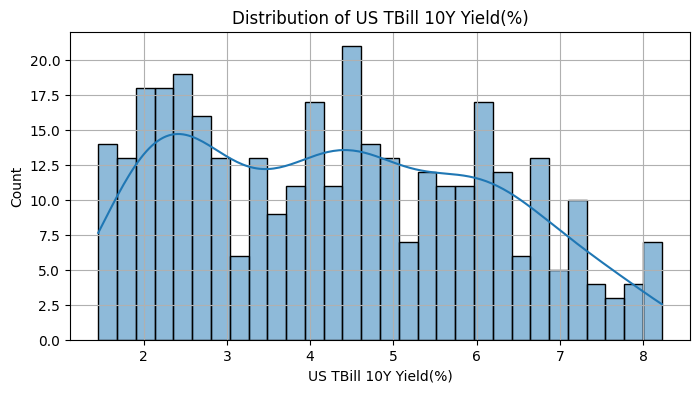

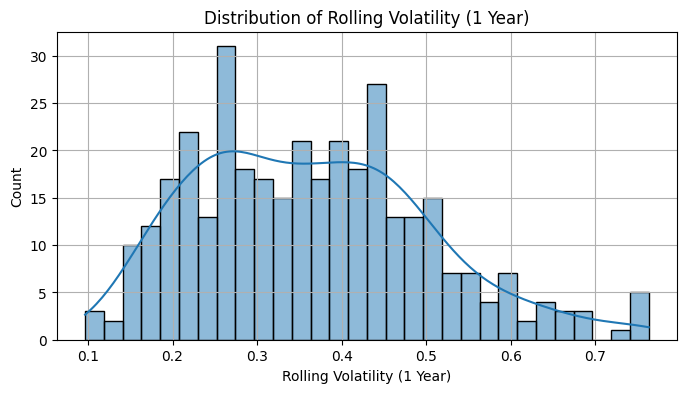

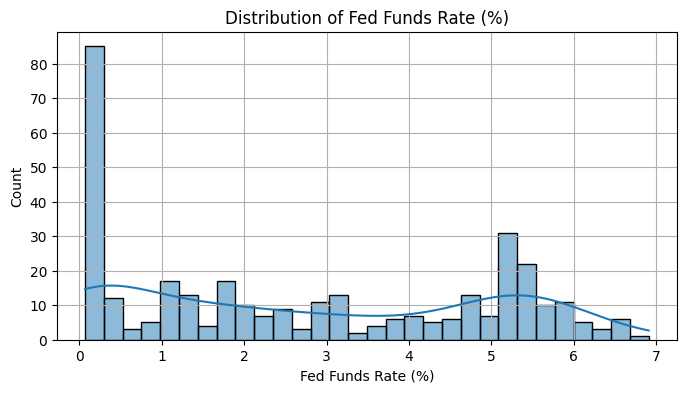

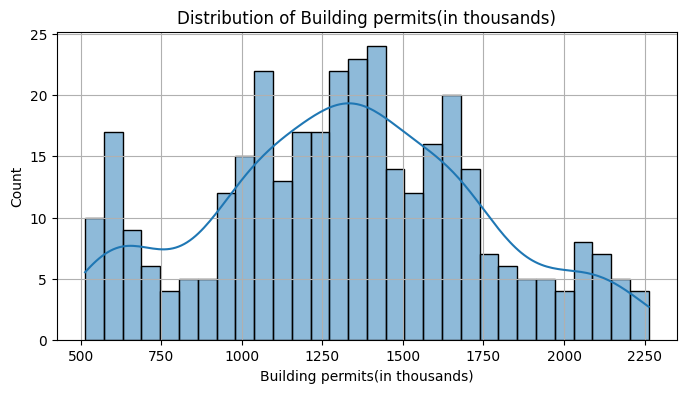

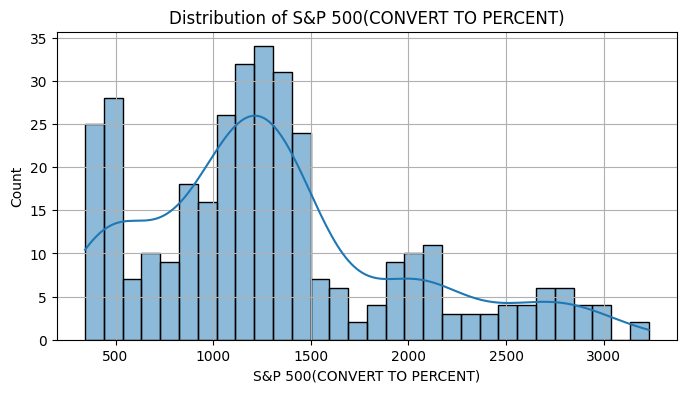

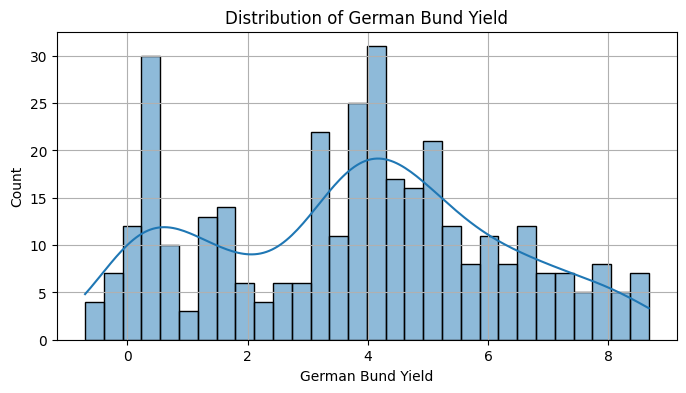

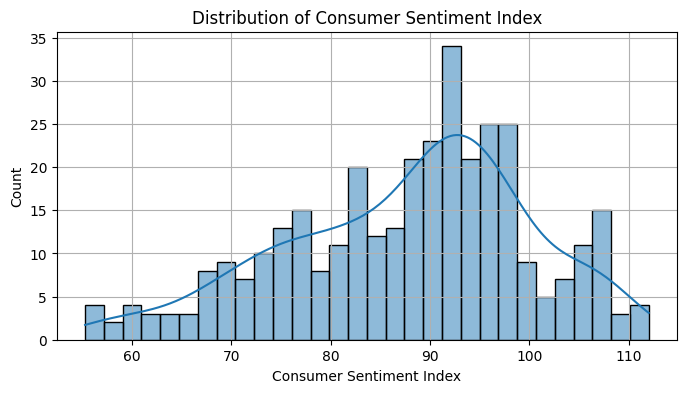

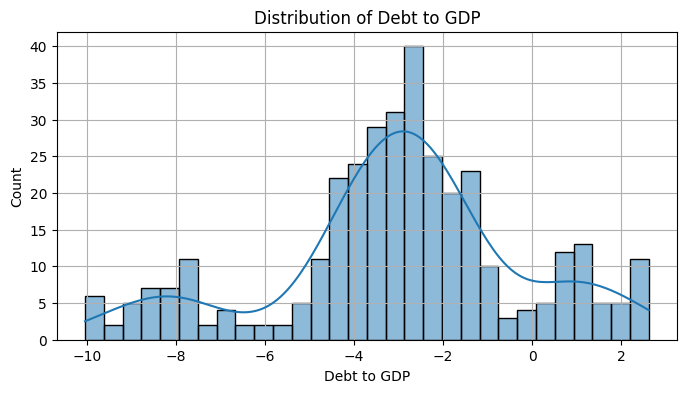

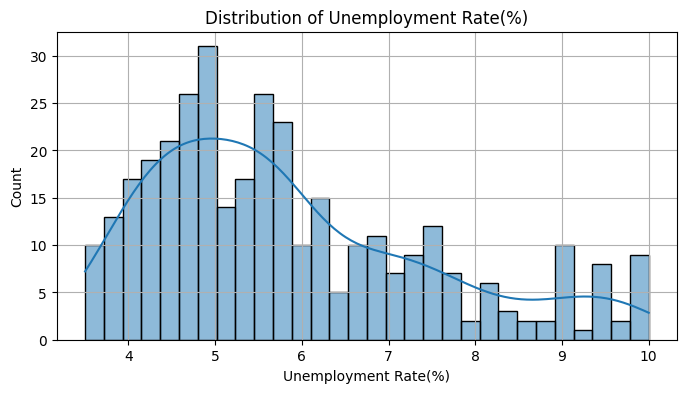

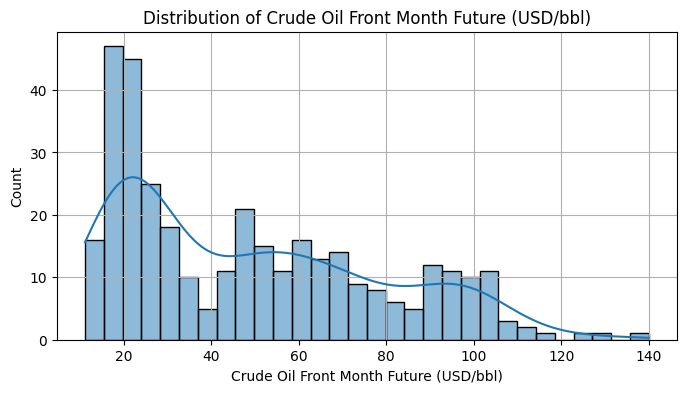

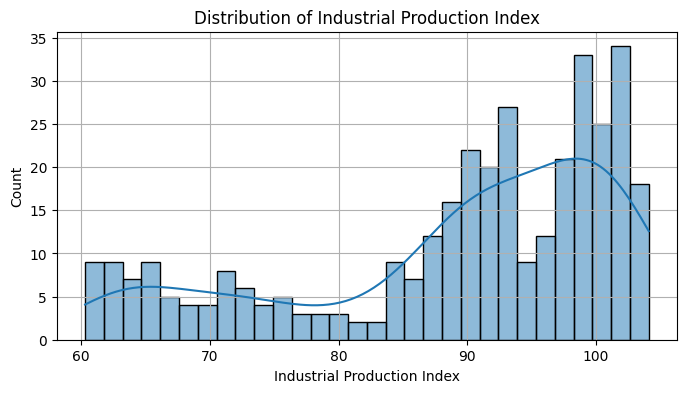

In [12]:
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.grid()
    plt.show()

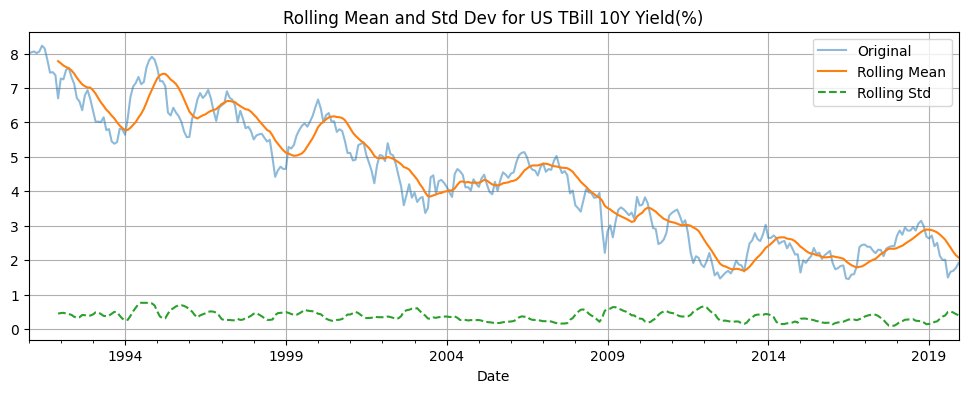

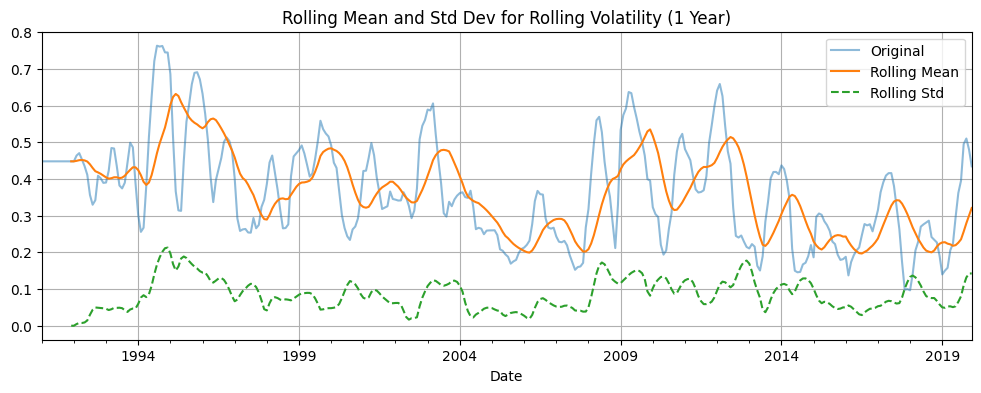

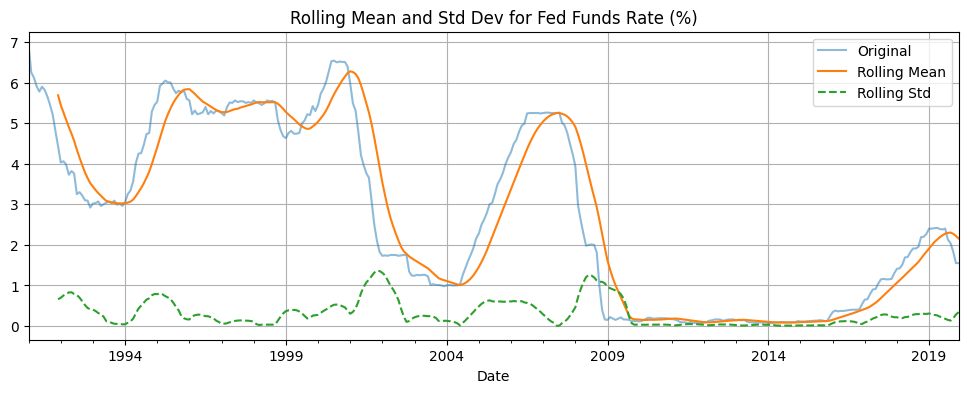

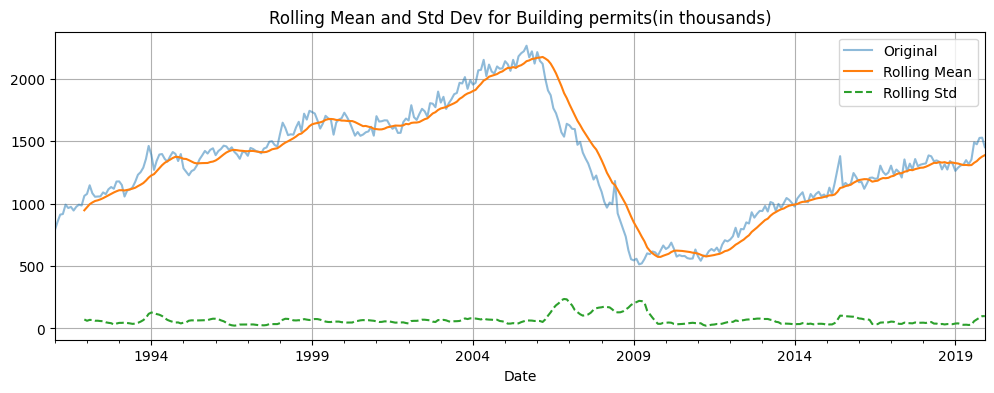

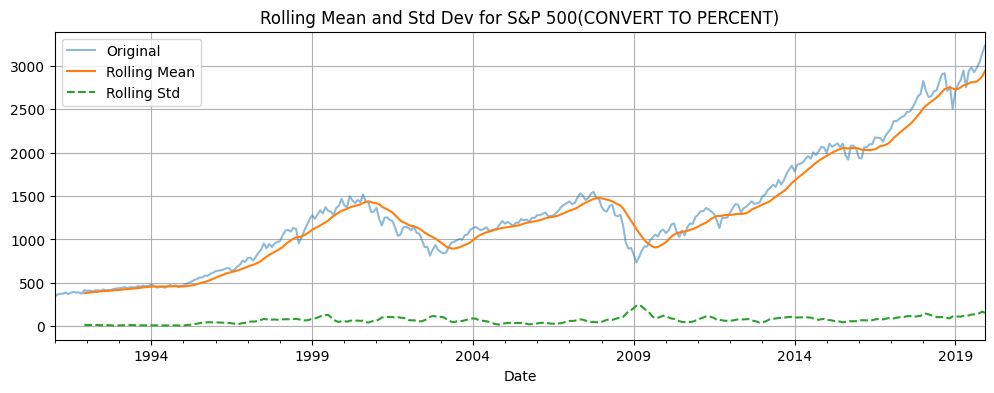

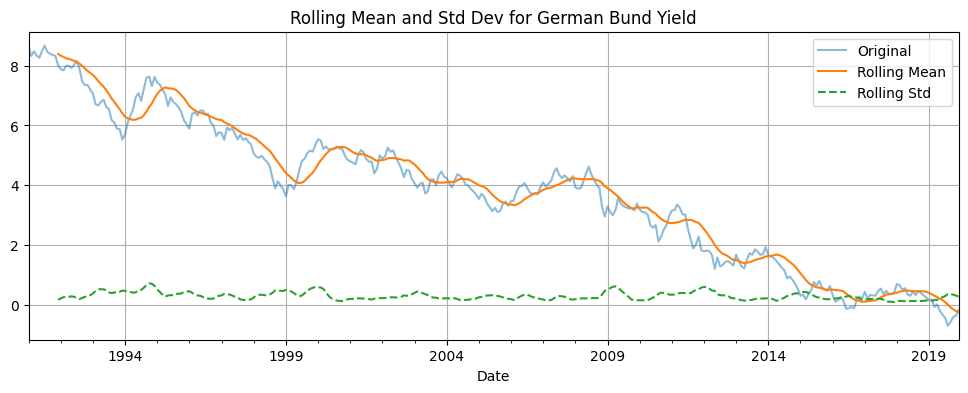

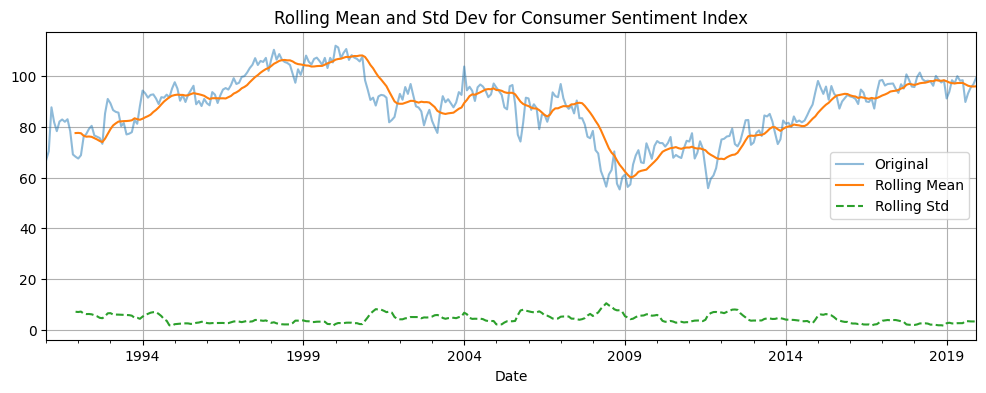

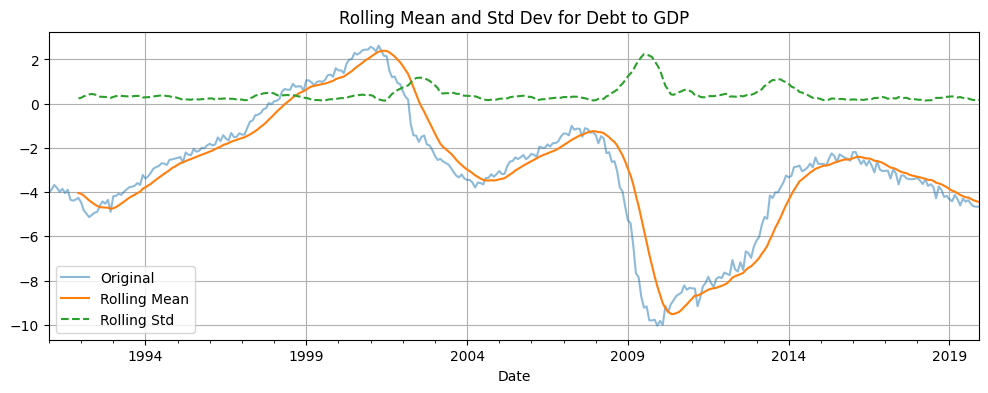

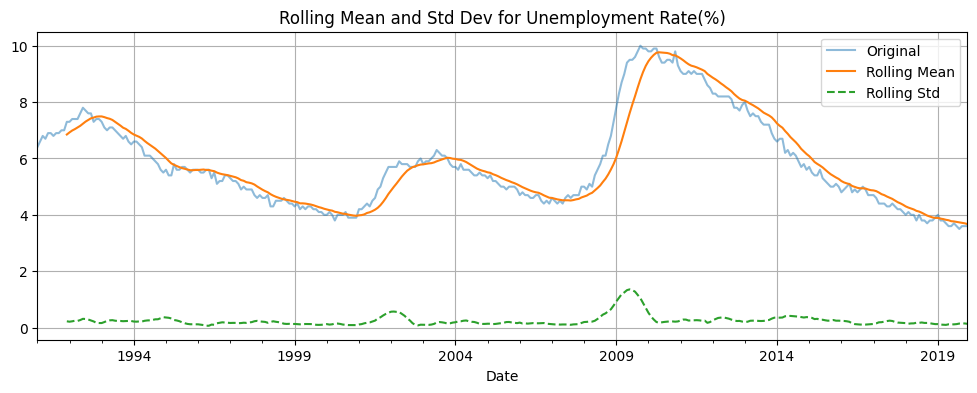

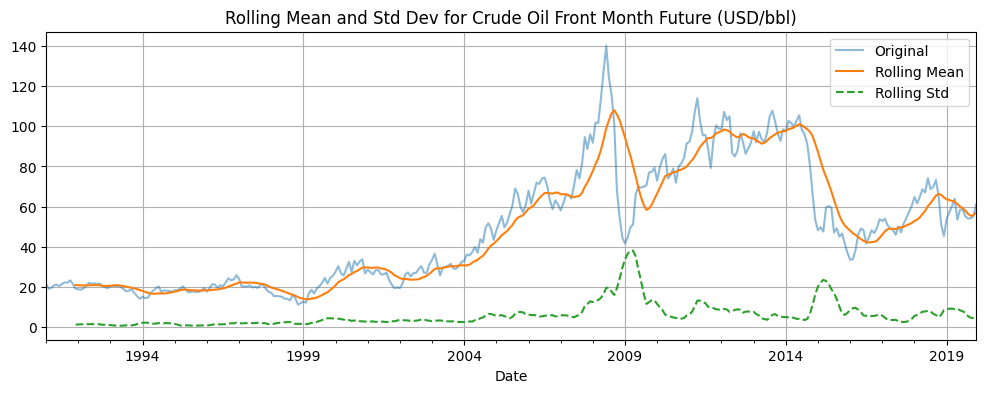

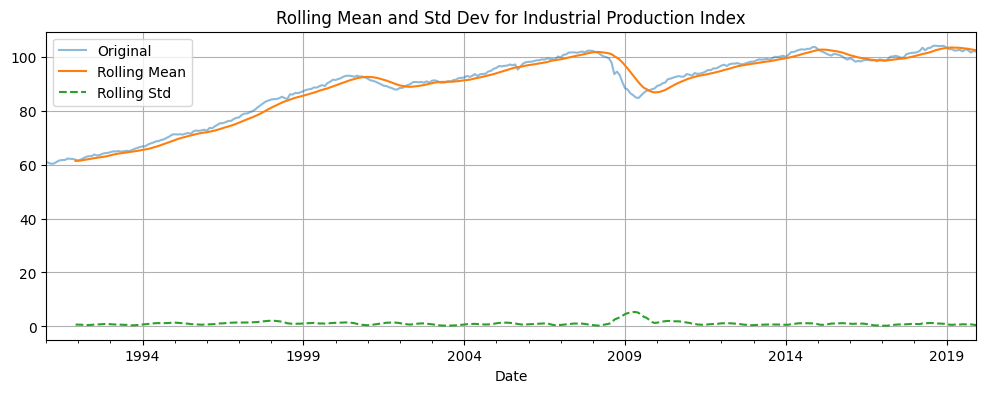

In [13]:
rolling_window = 12  #1 year

for col in df.columns:
    plt.figure(figsize=(12, 4))
    df[col].plot(label='Original', alpha=0.5)
    df[col].rolling(rolling_window).mean().plot(label='Rolling Mean')
    df[col].rolling(rolling_window).std().plot(label='Rolling Std', linestyle='--')
    plt.title(f"Rolling Mean and Std Dev for {col}")
    plt.legend()
    plt.grid()
    plt.show()

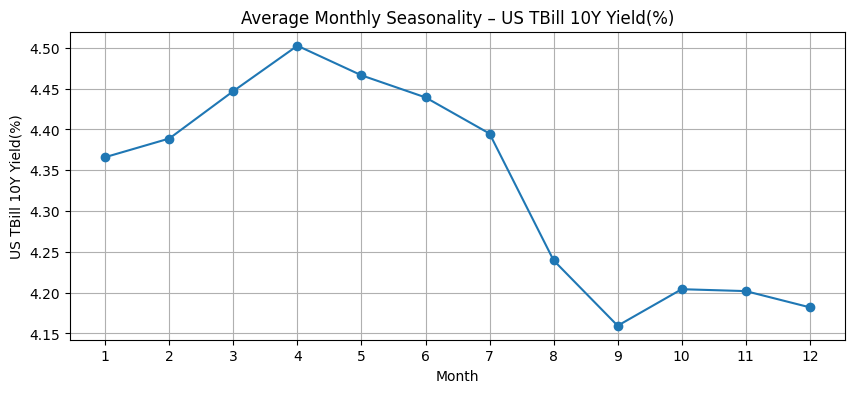

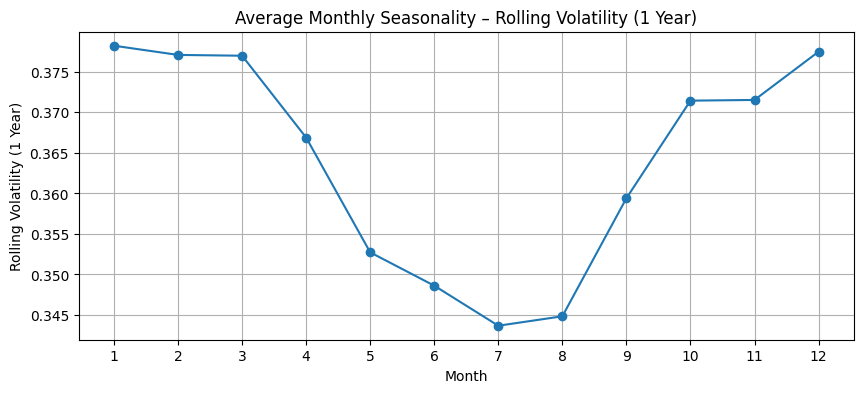

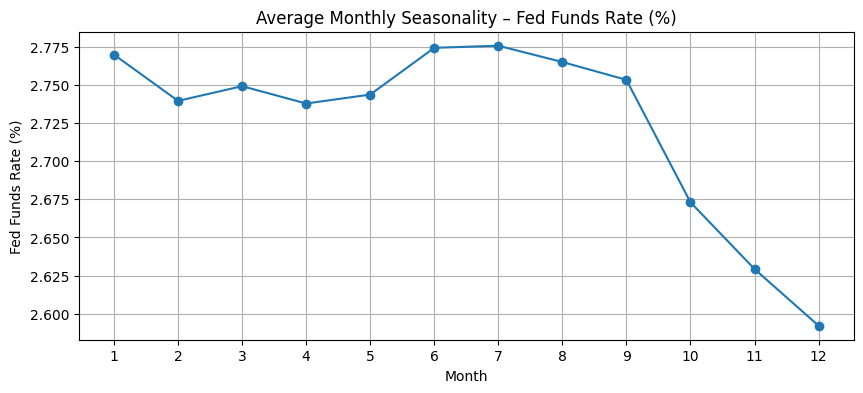

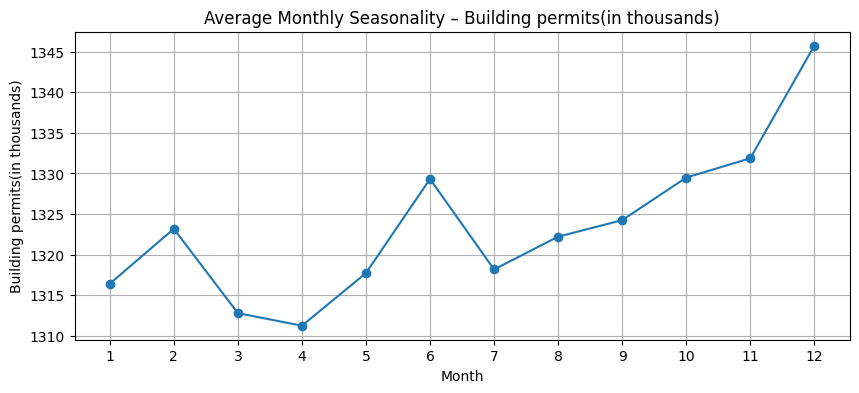

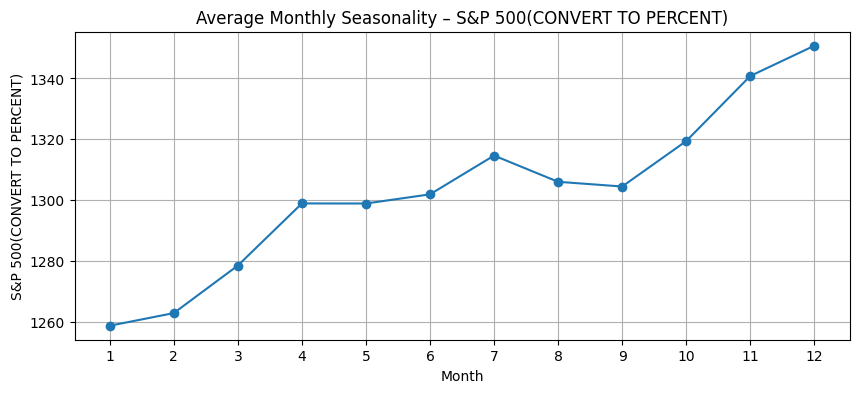

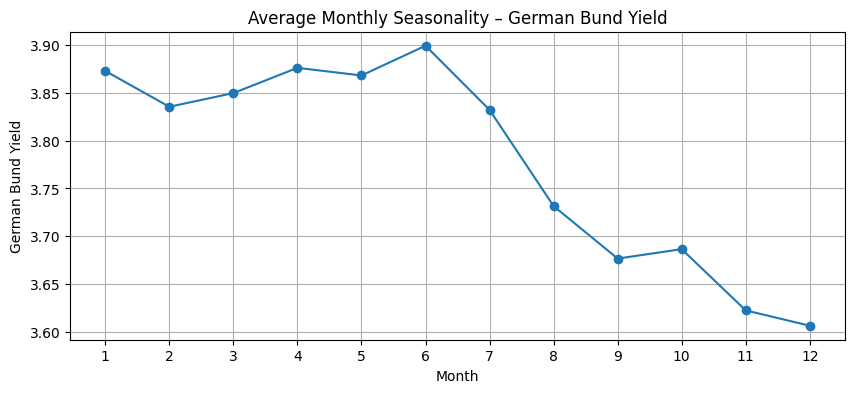

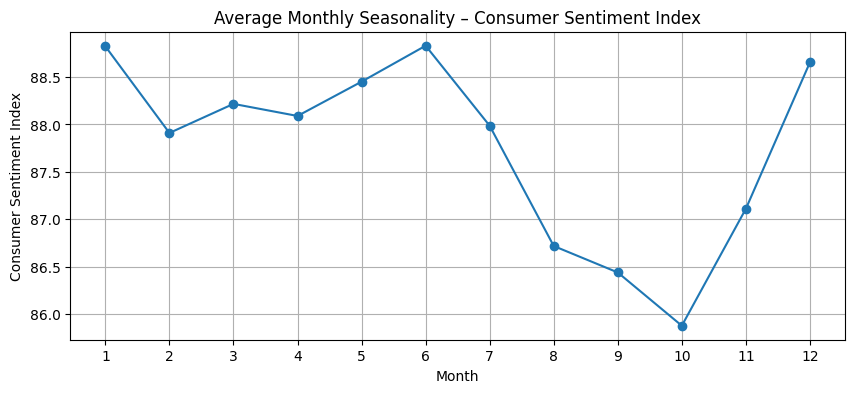

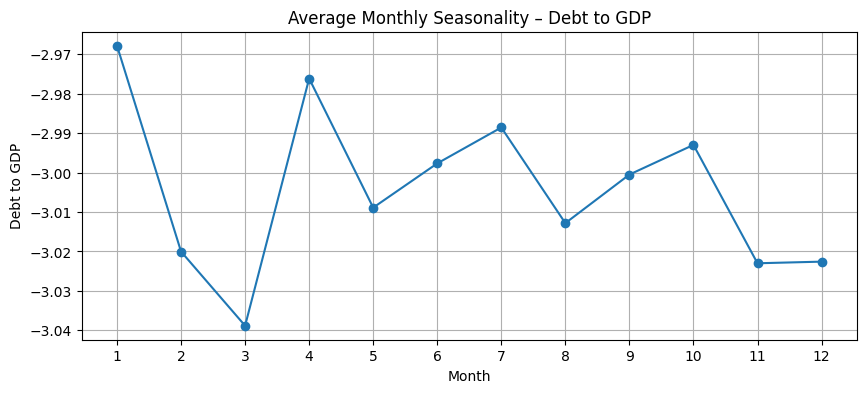

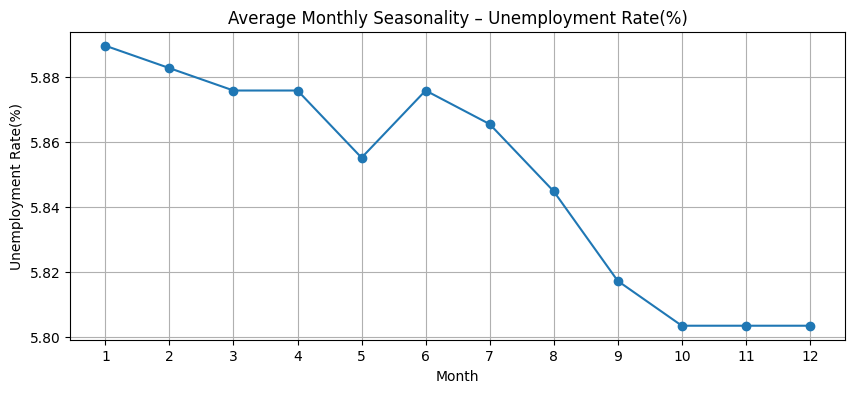

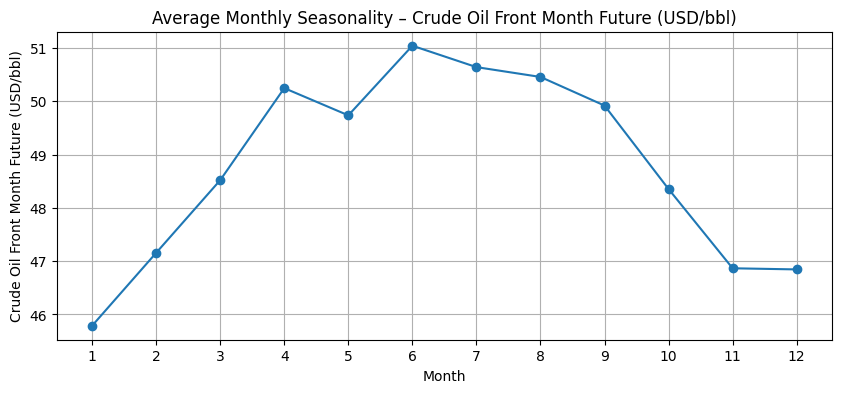

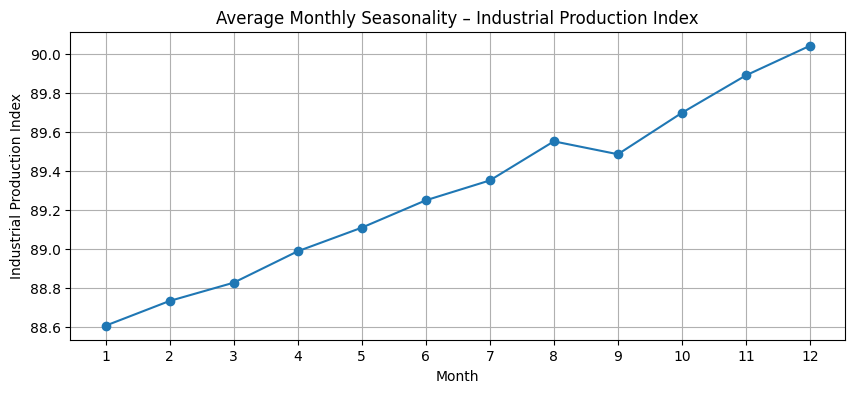

In [14]:
for col in df.columns:
    monthly_avg = df[col].groupby(df.index.month).mean()

    plt.figure(figsize=(10, 4))
    monthly_avg.plot(marker='o')
    plt.title(f"Average Monthly Seasonality – {col}")
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.xticks(range(1, 13))
    plt.grid()
    plt.show()

# Multivariate Analysis

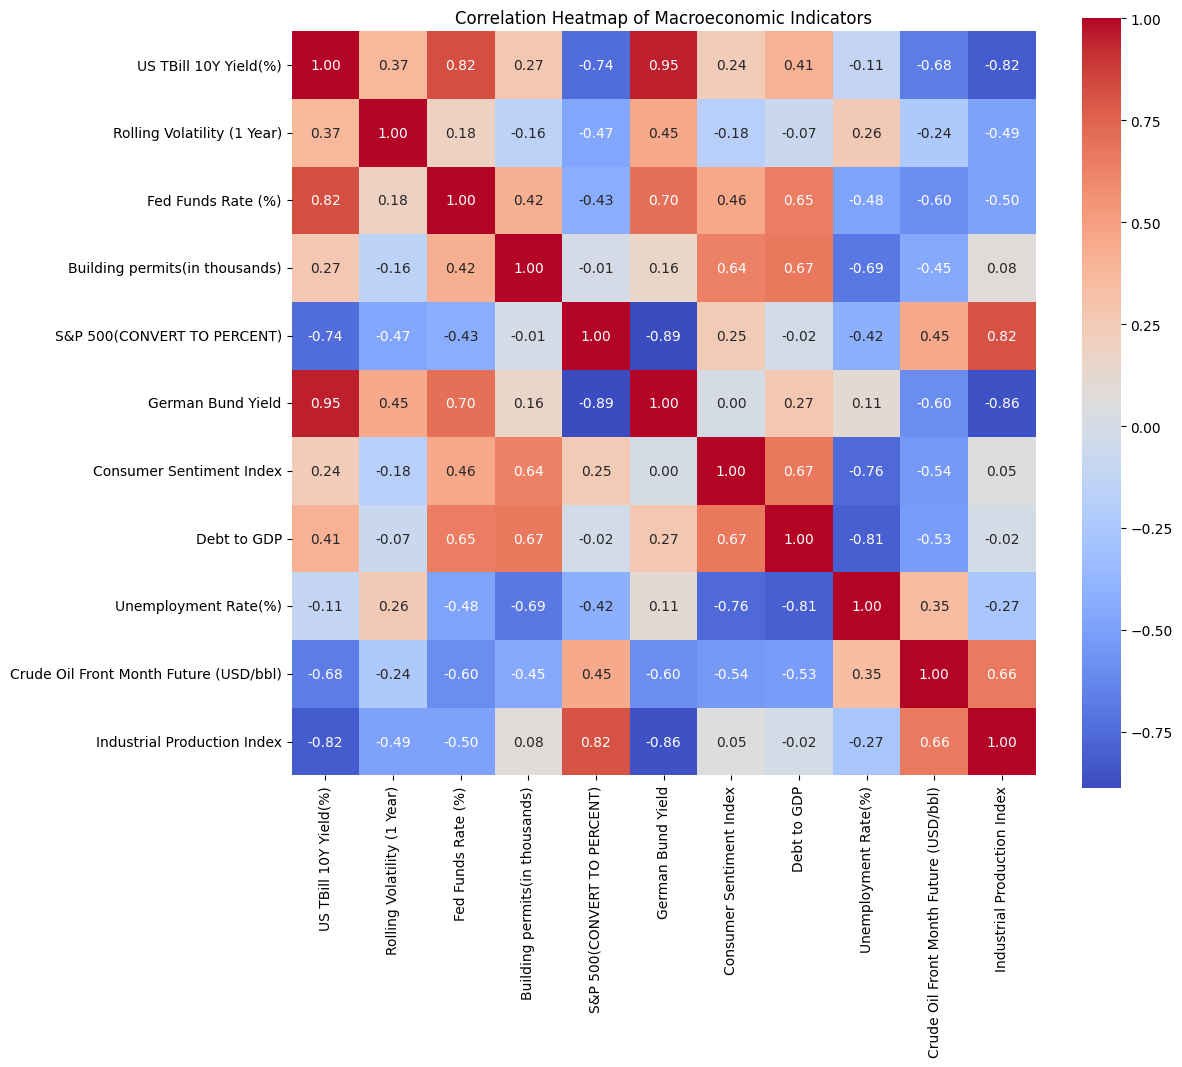

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Macroeconomic Indicators")
plt.show()

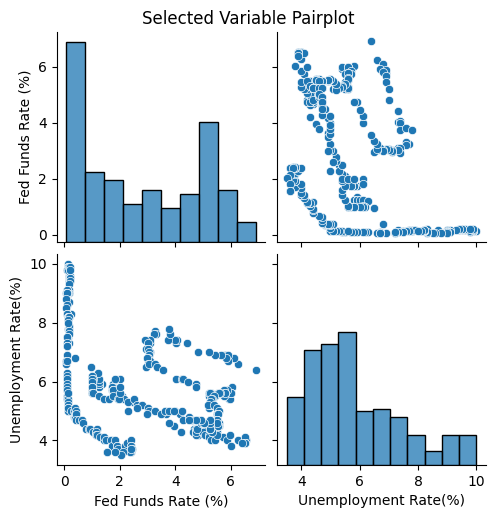

In [16]:
#Optional: For Focused Visuals
sns.pairplot(df[[
    'Fed Funds Rate (%)',
    'Unemployment Rate(%)'
]])
plt.suptitle("Selected Variable Pairplot", y=1.02)
plt.show()

In [17]:
X = df.dropna().copy()

# Add constant for VIF calculation
X_vif = add_constant(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

                                   Feature          VIF
0                                    const  1307.049995
1                    US TBill 10Y Yield(%)    36.702811
2              Rolling Volatility (1 Year)     1.400089
3                       Fed Funds Rate (%)     8.045557
4           Building permits(in thousands)     5.011312
5              S&P 500(CONVERT TO PERCENT)    20.149066
6                        German Bund Yield    52.178279
7                 Consumer Sentiment Index     4.851774
8                              Debt to GDP     7.931081
9                     Unemployment Rate(%)    19.076169
10  Crude Oil Front Month Future (USD/bbl)     7.090742
11             Industrial Production Index    16.049019


### Feature Engineering

1. S&P 500 to Percentage Change

In [18]:
df['S&P 500(%)'] = df['S&P 500(CONVERT TO PERCENT)'].pct_change() * 100
df = df.drop(columns=['S&P 500(CONVERT TO PERCENT)'])
df['S&P 500(%)'] = df['S&P 500(%)'].fillna(0)
print(df[['S&P 500(%)']].head())

            S&P 500(%)
Date                  
1991-01-01    0.000000
1991-02-01    6.728113
1991-03-01    2.220285
1991-04-01    0.034646
1991-05-01    3.857733


2. German Bond Yield Differencing

In [19]:
df['German_Bund_Yield_Diff'] = df['German Bund Yield'].diff()

3. Feature Interactions:

*   Economic_Stress = Unemployment_Rate * Industrial_Production

In [20]:
df['Economic_Stress'] = df['Unemployment Rate(%)'] * df['Industrial Production Index']

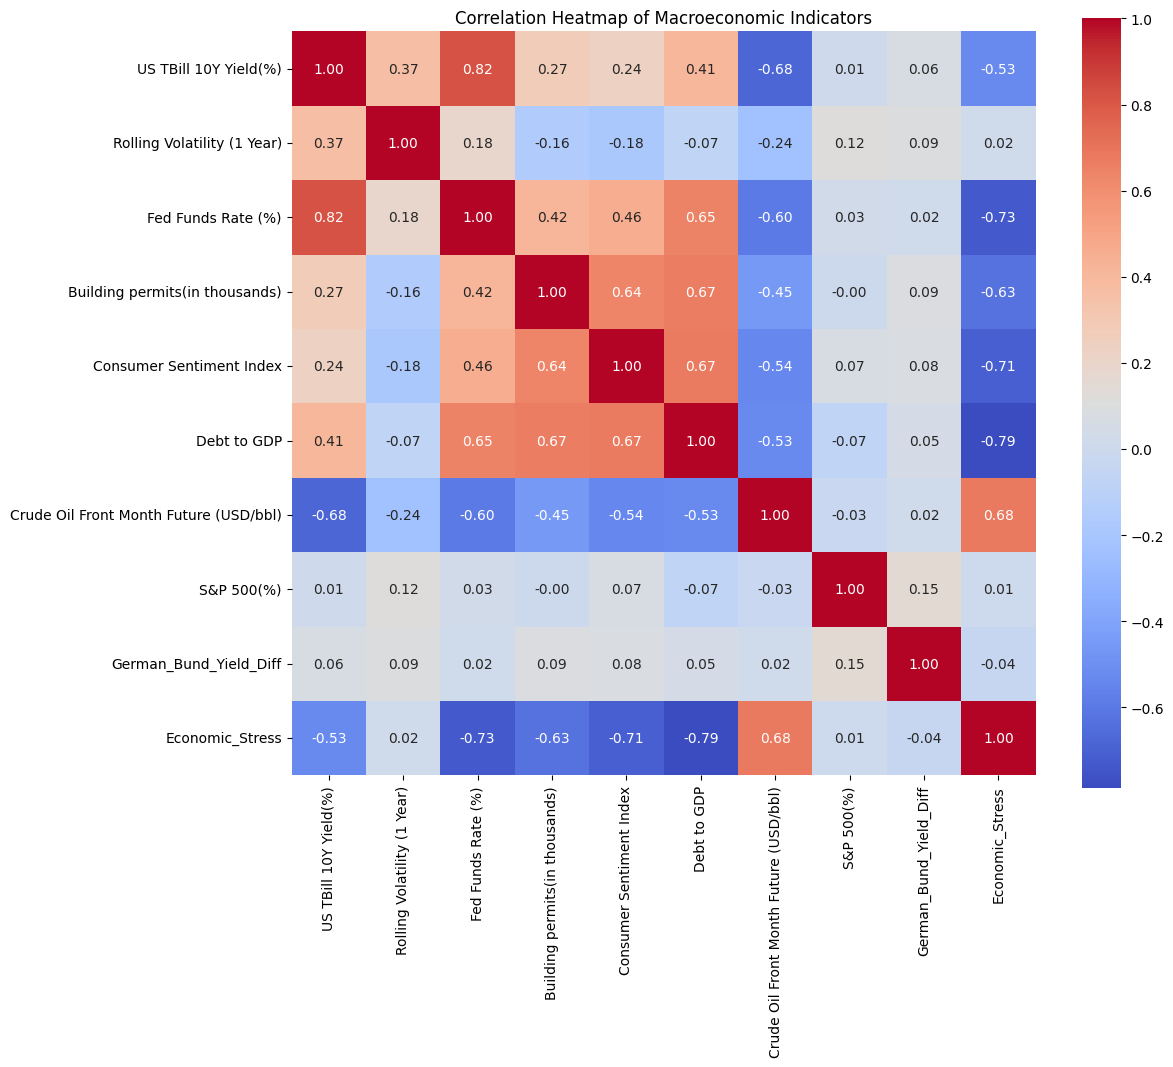

In [22]:
df.drop(columns=['Unemployment Rate(%)','Industrial Production Index','German Bund Yield'],inplace=True)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Macroeconomic Indicators")
plt.show()

In [24]:
df.to_excel("macroeconomic_features_cleaned.xlsx", index=True)